<a href="https://colab.research.google.com/github/nikx-bot/SCT_DS_2/blob/main/datacleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (891, 15)

First 5 rows:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class           

/tmp/ipython-input-1-270340994.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-1-270340994.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

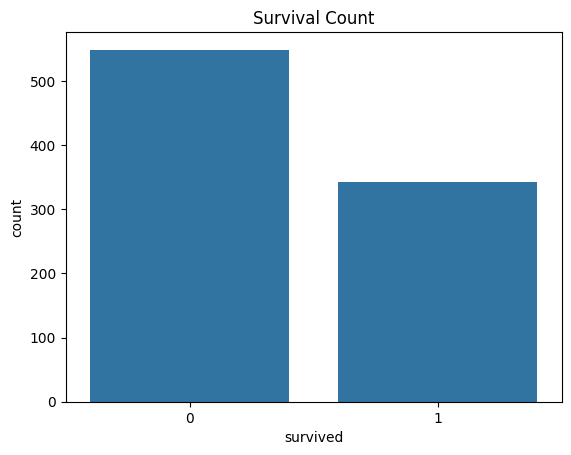

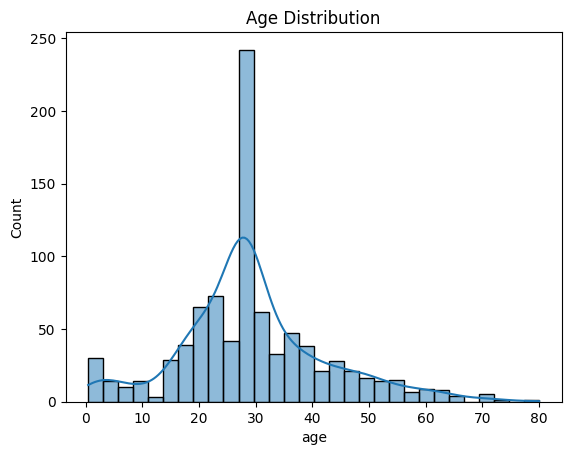

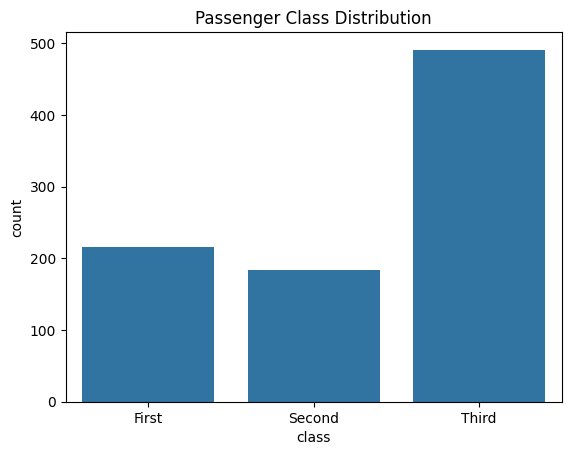

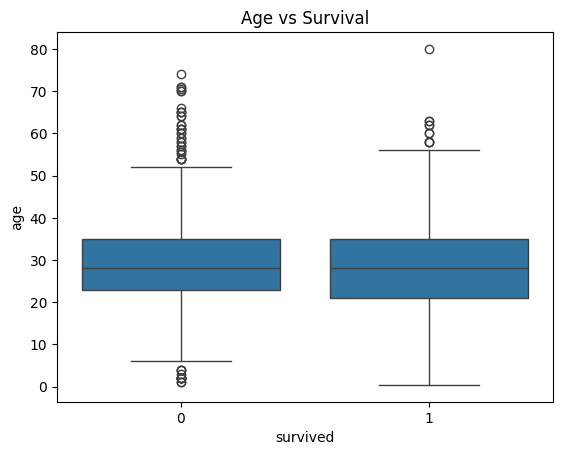

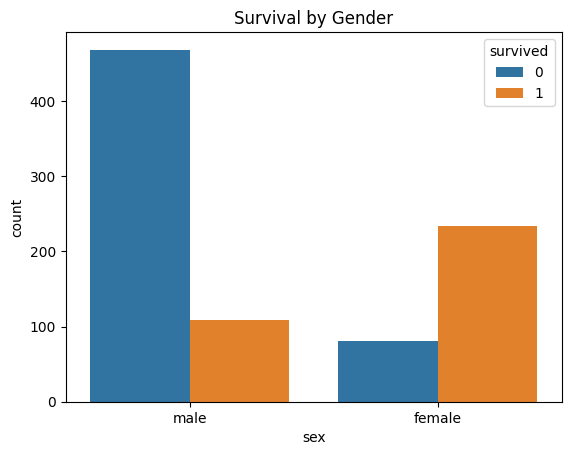

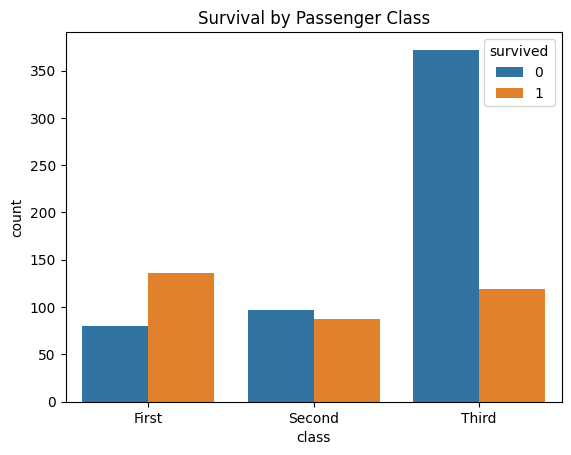

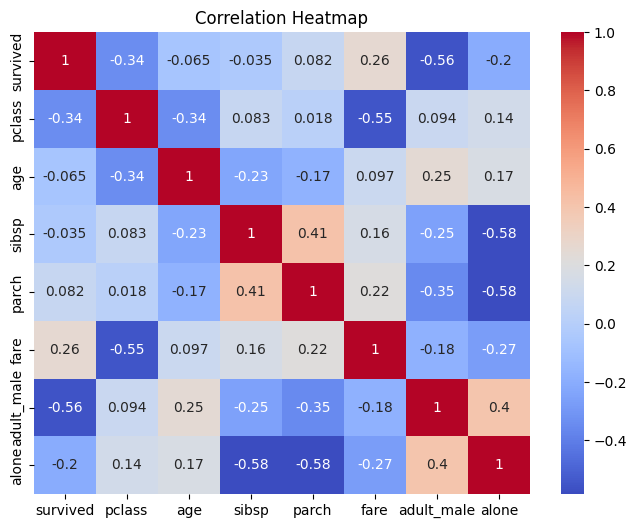


Summary Statistics:
          survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [1]:
# STEP 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Titanic dataset from seaborn (alternative to downloading from Kaggle)
df = sns.load_dataset('titanic')

# STEP 2: Basic Overview
print("Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

# STEP 3: Data Cleaning
# Drop columns with too many missing values or not useful for EDA
df.drop(columns=['deck', 'embark_town', 'alive'], inplace=True)

# Fill missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Check after cleaning
print("\nMissing after cleaning:\n", df.isnull().sum())

# STEP 4: EDA - Univariate Analysis
sns.countplot(data=df, x='survived')
plt.title("Survival Count")
plt.show()

sns.histplot(df['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

sns.countplot(data=df, x='class')
plt.title("Passenger Class Distribution")
plt.show()

# STEP 5: Bivariate Analysis
sns.boxplot(x='survived', y='age', data=df)
plt.title("Age vs Survival")
plt.show()

sns.countplot(data=df, x='sex', hue='survived')
plt.title("Survival by Gender")
plt.show()

sns.countplot(data=df, x='class', hue='survived')
plt.title("Survival by Passenger Class")
plt.show()

# STEP 6: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# STEP 7: Summary
print("\nSummary Statistics:\n", df.describe())
